### Standard Error example - Counting Die

A die is rolled 60 times, find:

 1. Total number of spots `____`, give or take `____`
 2. The number of 6's should be around `____`, give or take `____`

### First simulate 60 throws of a die

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

results = np.random.randint(1, 7, size=60)
results

array([2, 5, 2, 2, 5, 1, 1, 5, 3, 1, 5, 1, 2, 3, 3, 3, 6, 1, 3, 5, 4, 6,
       2, 3, 5, 5, 1, 1, 6, 2, 5, 4, 4, 5, 2, 4, 4, 4, 6, 5, 3, 6, 1, 3,
       1, 1, 1, 3, 2, 6, 5, 6, 4, 3, 1, 5, 6, 3, 6, 1])

In [2]:
bins = np.arange(1, results.max() + 1.5) - 0.5
bins

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

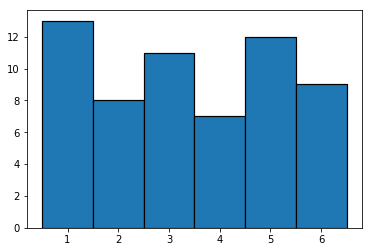

In [3]:
fig, ax = plt.subplots()
_ = ax.hist(results, bins, edgecolor='black', linewidth=1.2)
_ = ax.set_xticks(bins[:-1] + 0.5 )

### Calculations

#### Expected value

In [4]:
num_throws = 60

box = [ 1,2,3,4,5,6 ]

expected_value_one_draw = 1/6 + 2/6 + 3/6 + 4/6 + 5/6 + 6/6
expected_value_one_draw

3.5

In [5]:
expected_value_total = expected_value_one_draw * num_throws
expected_value_total

210.0

In [6]:
import scipy as sp
import numpy as np

#### Standard Error

In [7]:
SD = np.std(box)
SD

1.707825127659933

In [8]:
SE = sp.sqrt(num_throws) * SD
SE

13.228756555322953

#### Approximate number of 6's

In [9]:
box = [ 0,0,0,0,0,1 ]

expected_value_one_draw = 1/6
expected_value_one_draw

0.16666666666666666

In [10]:
expected_value_total = expected_value_one_draw * num_throws
expected_value_total

10.0

In [11]:
SD = np.std(box)
SD

0.372677996249965

In [12]:
SE = sp.sqrt(num_throws) * SD
SE

2.8867513459481295

#### Verify by simulation

First lets figure out how to count the sixes in one batch of 60 throws

In [13]:
sixty_throws = np.random.randint(1, 7, size=60)
sixty_throws

array([5, 3, 3, 1, 6, 2, 3, 5, 1, 4, 4, 3, 6, 5, 2, 4, 5, 2, 6, 6, 5, 4,
       6, 1, 4, 1, 6, 1, 5, 3, 2, 2, 4, 2, 4, 5, 2, 3, 1, 5, 3, 3, 5, 1,
       3, 2, 2, 6, 1, 3, 1, 1, 6, 4, 3, 1, 5, 2, 4, 6])

In [14]:
np.sum(sixty_throws == 6)

9

Now lets simulate repeating 60 throws 10,000 times

In [15]:
results = []

for i in range(0, 10000):
    sixty_throws = np.random.randint(1, 7, size=60)
    num_sixes = np.sum(sixty_throws == 6)
    results.append(num_sixes)
    
results = np.array(results)
results

array([ 9, 15, 15, ...,  6, 10, 11])

In [16]:
np.mean(results)

10.0586

In [17]:
np.std(results)

2.9260837376944635

Nice! Simulation results are similar to calculated results

#### Display simulation as a histogram

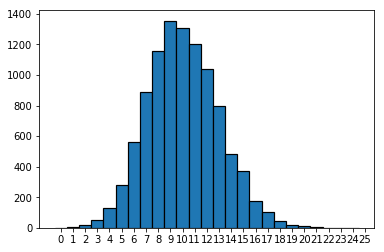

In [18]:
bins = np.arange(0, results.max() + 1.5) - 0.5

fig, ax = plt.subplots()
_ = ax.hist(results, bins, edgecolor='black', linewidth=1.2)
_ = ax.set_xticks(bins + 0.5)

### Check if 99.7% of values are within 3 std errors

$z = \frac{X - \bar{X}}{SD} ; X = (z * SD) + \bar{X}$

In [40]:
x_lower = expected_value_total - (3 * SE)
x_lower

1.339745962155611

In [41]:
x_upper = expected_value_total + (3 * SE)
x_upper

18.66025403784439

In [43]:
num_within_3_SEs = np.sum((results > x_lower) & (results < x_upper))
num_within_3_SEs

9965

In [44]:
num_within_3_SEs / 10000

0.9965

This looks pretty close